In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import os

In [54]:
train_datagen = ImageDataGenerator(
    rescale= 1
)
test_datagen = ImageDataGenerator(
    rescale= 1
)

In [55]:
df_train = '.\images'
os.listdir(df_train)

['Test', 'Train']

Found 1901 images belonging to 2 classes.


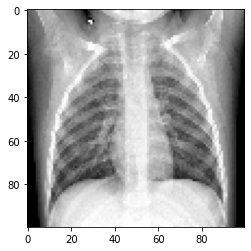

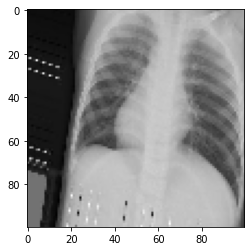

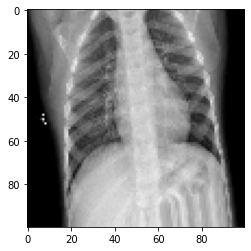

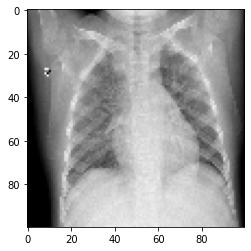

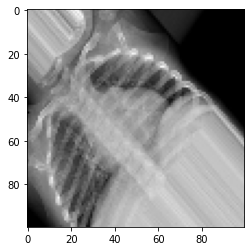

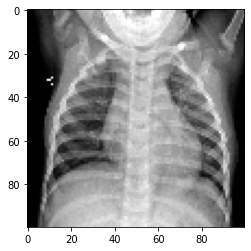

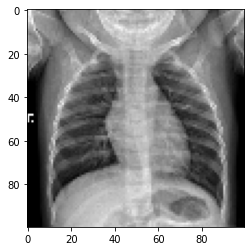

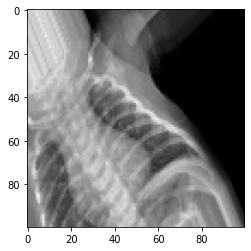

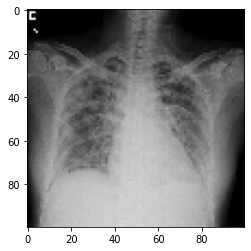

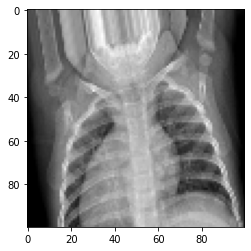

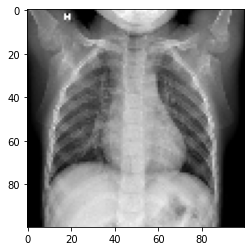

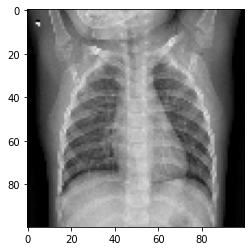

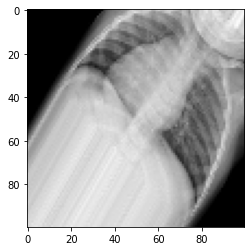

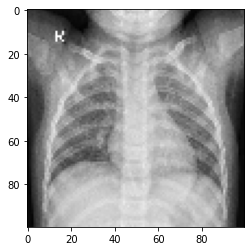

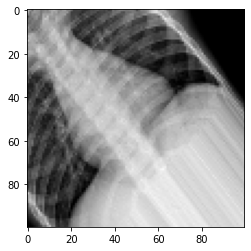

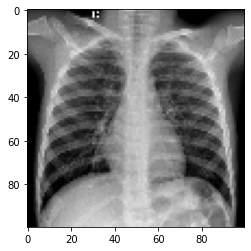

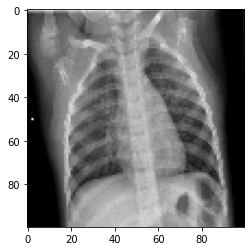

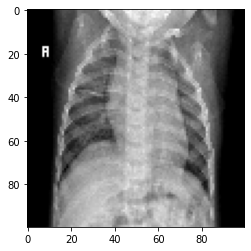

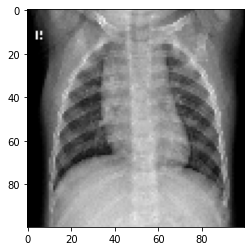

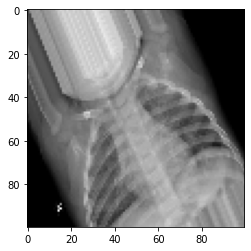

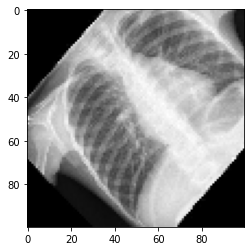

In [56]:
i = 0

for batch in test_datagen.flow_from_directory('images',target_size=(100,100),
                                                  batch_size = 1):
    images = batch[0].astype('uint8')
    image = np.squeeze(images)
    i = i+1
    plt.imshow(image)
    plt.show()
    
    if i > 20 :
         break

In [57]:
model = keras.Sequential()

In [58]:
model.add(layers.Conv2D(8,(3,3),activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())


model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [59]:
train_itreator = train_datagen.flow_from_directory('images/Train',batch_size =64,target_size=(100,100))
test_itreator = test_datagen.flow_from_directory('images/Test',batch_size =64,target_size=(100,100))

Found 1330 images belonging to 2 classes.
Found 571 images belonging to 2 classes.


In [60]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(test_itreator,validation_data=train_itreator,epochs=8)
print(model.summary())

Epoch 1/8
9/9 [==============================] - 14s 2s/step - loss: 44.0284 - accuracy: 0.7356 - val_loss: 14.9857 - val_accuracy: 0.9368
Epoch 2/8
9/9 [==============================] - 11s 1s/step - loss: 7.7806 - accuracy: 0.9370 - val_loss: 2.0084 - val_accuracy: 0.9368
Epoch 3/8
9/9 [==============================] - 11s 1s/step - loss: 1.2327 - accuracy: 0.9177 - val_loss: 0.3796 - val_accuracy: 0.9368
Epoch 4/8
9/9 [==============================] - 11s 1s/step - loss: 0.5283 - accuracy: 0.9212 - val_loss: 0.2252 - val_accuracy: 0.9331
Epoch 5/8
9/9 [==============================] - 11s 1s/step - loss: 0.3125 - accuracy: 0.9317 - val_loss: 0.2175 - val_accuracy: 0.9504
Epoch 6/8
9/9 [==============================] - 11s 1s/step - loss: 0.1197 - accuracy: 0.9527 - val_loss: 0.6068 - val_accuracy: 0.9368
Epoch 7/8
9/9 [==============================] - 11s 1s/step - loss: 0.1506 - accuracy: 0.9667 - val_loss: 0.2449 - val_accuracy: 0.9579
Epoch 8/8
9/9 [========================

<AxesSubplot:ylabel='Count'>

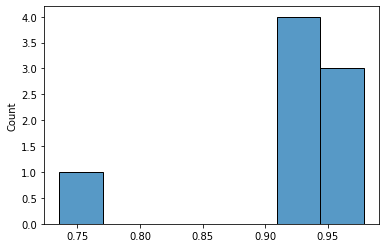

In [61]:
sns.histplot(history.history['accuracy'])

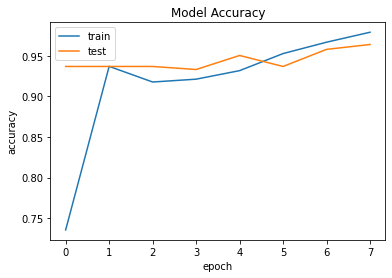

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

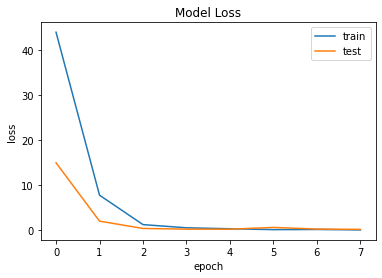

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()